<h1>Activity 1 (Finals) : Dengue</h1>
<hr>
<h1> Analysis: Ron Jerick T. Gamba</h1>


In [34]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

<h1>Reading Data</h1>
<hr>

In [35]:
dengue = pd.read_csv("datasets/dengue.csv")
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Describing Data</h1>
<hr>


In [36]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [37]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [38]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [39]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


In [40]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [41]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1>Data Visualizations Using SNS </h1>
<hr>

<h1>Which months have the most Dengue cases each year?</h1>

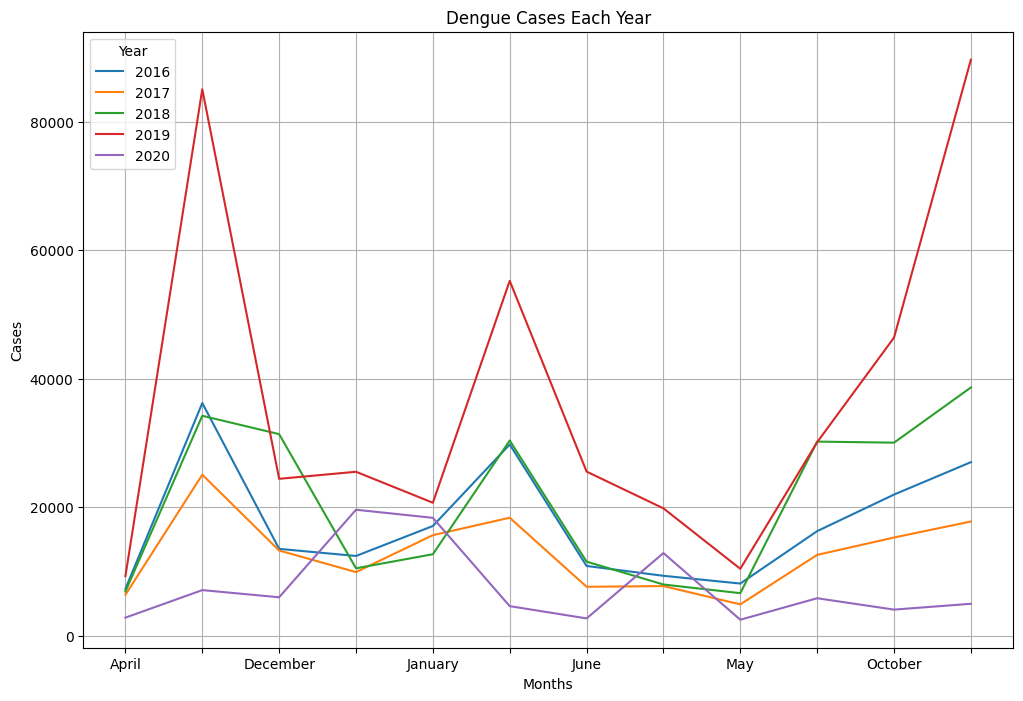

In [42]:
monthly_cases = dengue.groupby(["Month", "Year"])["Dengue_Cases"].sum()
monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.title("Dengue Cases Each Year")
plt.xlabel("Months")
plt.ylabel("Cases")
plt.xticks(range(0,12))
plt.show()

# Insights
## Base on the line plot year 2019 have the most cases in other year, month-by-month across different years, making it easy to spot seasonal peaks.

<hr>

# Which regions have the highest number of dengue cases overall?


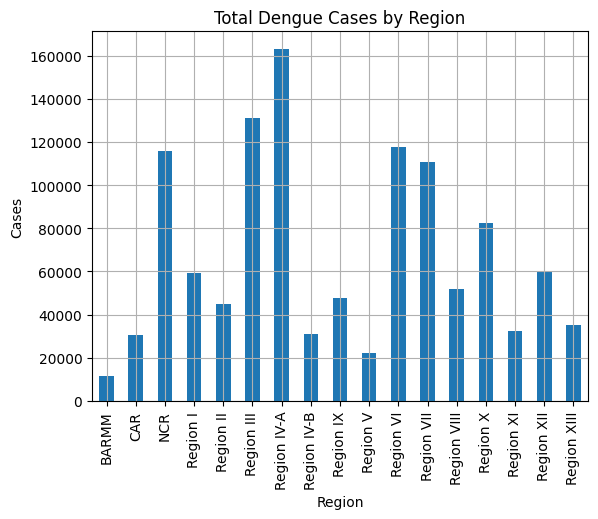

In [43]:
dengue.groupby("Region")["Dengue_Cases"].sum().plot(kind='bar')
plt.title("Total Dengue Cases by Region")
plt.grid(True)
plt.xlabel("Region")
plt.ylabel("Cases")
plt.show()


# Insights : 
### NCR and Region IV-A have the highest dengue cases, which could be linked to dense urban populations and higher exposure risks.
<hr>

# Which regions recorded the most dengue-related deaths?

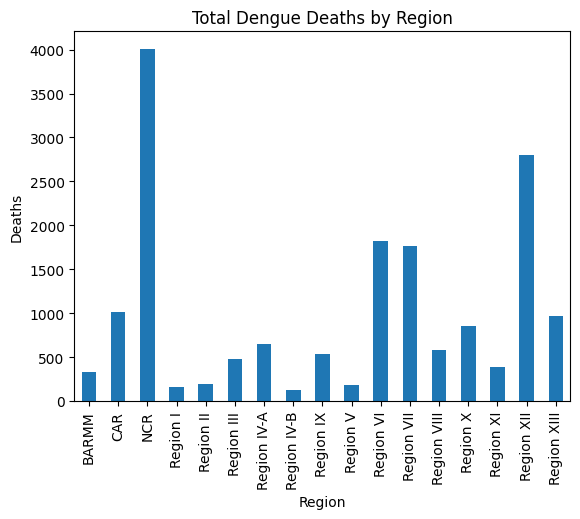

In [44]:
dengue.groupby("Region")["Dengue_Deaths"].sum().plot(kind='bar')
plt.title("Total Dengue Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Deaths")
plt.show()


# Region XII and NCR show the most deaths, indicating possible healthcare challenges or higher infection severity in these areas.
<hr>

# Which region has the highest dengue mortality rate?

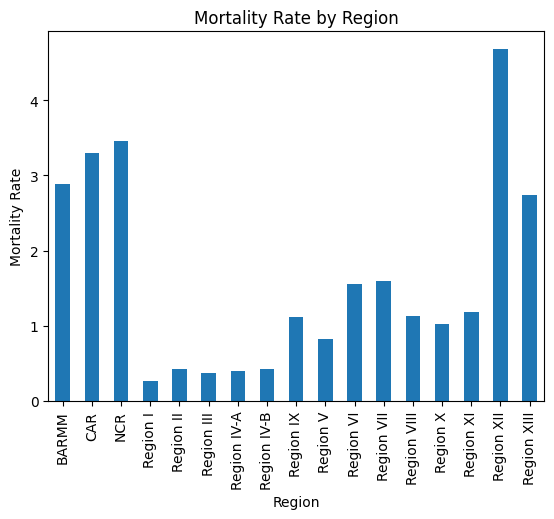

In [46]:
Regional_Death.groupby("Region")["Mortality_Rate"].mean().plot(kind='bar')
plt.title("Mortality Rate by Region")
plt.xlabel("Region")
plt.ylabel("Mortality Rate")
plt.show()


# Insight:
### Region XII stands out with the highest mortality rate, showing that even with fewer cases compared to NCR, fatalities are proportionally higher.
<hr>

# How do dengue cases and deaths compare within each region?

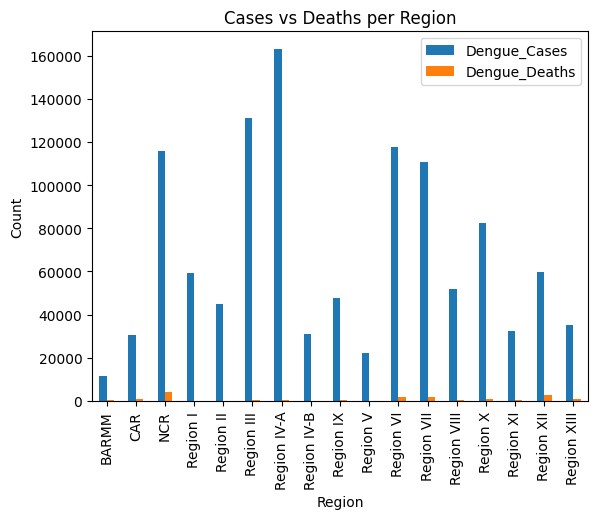

In [48]:
Regional_Death.groupby("Region")[["Dengue_Cases","Dengue_Deaths"]].sum().plot(kind='bar')
plt.title("Cases vs Deaths per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


# Insight: 
### Regions with a large number of cases also tend to have more deaths, showing a direct relationship between case volume and fatality risk.
<hr>

# Correlation between Cases and Deaths

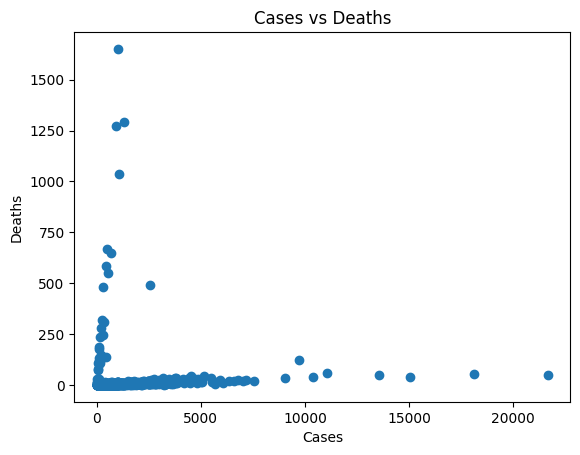

In [49]:
plt.scatter(dengue["Dengue_Cases"], dengue["Dengue_Deaths"])
plt.title("Cases vs Deaths")
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.show()


# Insight:
### A positive correlation exists—regions with more dengue cases usually experience higher death counts.<hr>

# Mortality Rate vs Cases

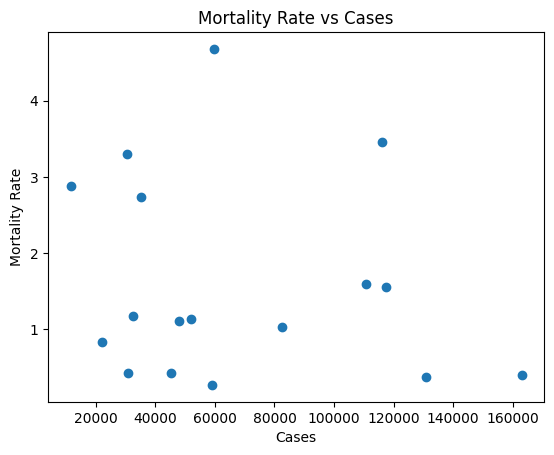

In [53]:
plt.scatter(Regional_Death["Dengue_Cases"], Regional_Death["Mortality_Rate"])
plt.title("Mortality Rate vs Cases")
plt.xlabel("Cases")
plt.ylabel("Mortality Rate")
plt.show()


# Insight:
### Regions with large numbers of cases often maintain moderate mortality rates, suggesting effective response and control efforts in high-density areas.<hr>

# Which regions are most at risk based on mortality rate?

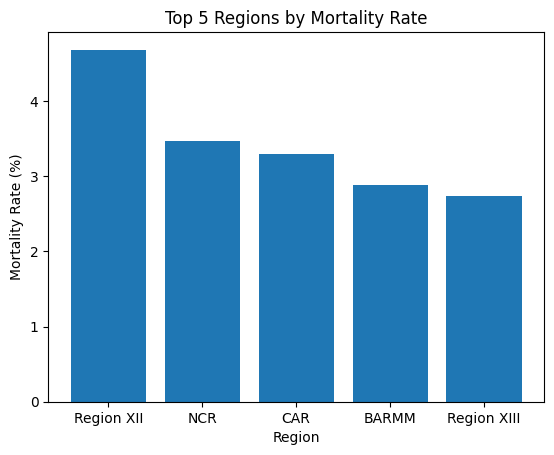

In [55]:
top5 = Regional_Death.sort_values(by="Mortality_Rate", ascending=False).head(5)

plt.bar(top5["Region"], top5["Mortality_Rate"])
plt.title("Top 5 Regions by Mortality Rate")
plt.xlabel("Region")
plt.ylabel("Mortality Rate (%)")
plt.show()


# Insight:
### Region XII, NCR, and CAR have the highest mortality rates, indicating these regions experience more severe dengue outcomes compared to others.<hr>

# Is there a connection between the number of dengue cases and deaths in each region?

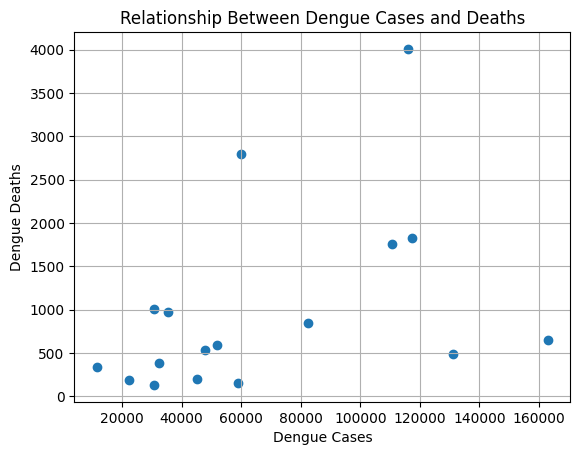

In [57]:
plt.scatter(Regional_Death["Dengue_Cases"], Regional_Death["Dengue_Deaths"])
plt.title("Relationship Between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()


# Insight:
### Regions with more dengue cases generally have higher deaths, showing a positive correlation — meaning that as infections rise, fatalities also tend to increase.<hr>

# When considering both cases and mortality rate, which regions are most severely affected?

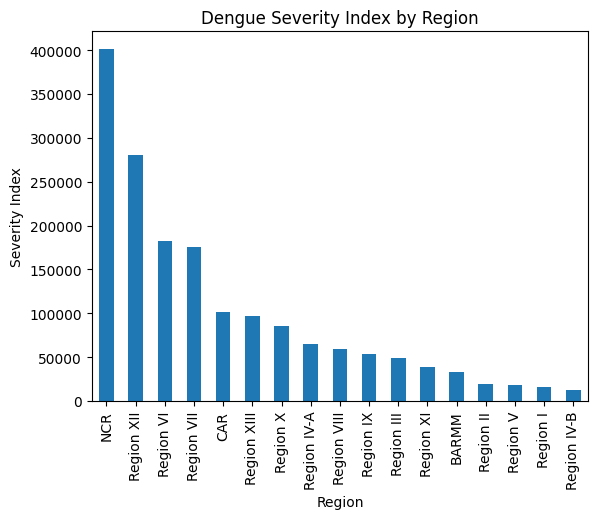

In [59]:
Regional_Death["Severity_Index"] = Regional_Death["Dengue_Cases"] * Regional_Death["Mortality_Rate"]
Regional_Death.sort_values("Severity_Index", ascending=False).set_index("Region")["Severity_Index"].plot(kind='bar')
plt.title("Dengue Severity Index by Region")
plt.xlabel("Region")
plt.ylabel("Severity Index")
plt.show()


# Insight:
### NCR and Region XII rank as the most severely affected regions, combining both high case numbers and significant mortality rates.